In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle
import numpy as np

In [2]:
date = "20230427"
nlct_path = "nlct_data/"+date+"/"

In [3]:
filename = 'goes_e_ntlc_'+date[0:4]+'_'+date[4:6]+'_'+date[6:8]+'_00H_00M'

file = open(nlct_path+filename, 'rb')
BTD = pickle.load(file)
file.close()

In [4]:
#---Northeast US
min_lon = -83
min_lat = 26
max_lon = -51
max_lat = 50

#---Chilean Coast
# min_lon = -95
# min_lat = -37
# max_lon = -65
# max_lat = -10

#--- Oaxaca
# min_lon = -109
# min_lat = 10
# max_lon = -81
# max_lat = 24

In [5]:
BTD_masked = BTD[0].where(BTD[0] >= 0, 0)

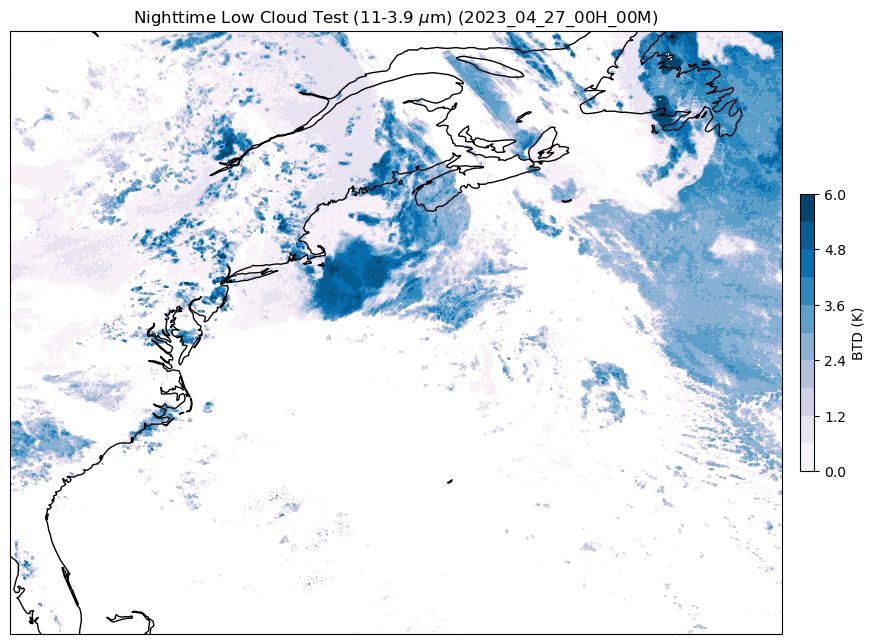

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.PuBu
levels = np.linspace(0, 6, 11)

ax.set_extent([min_lon, max_lon, min_lat, max_lat])
c=ax.contourf(BTD.lon, BTD.lat, BTD[0], cmap=cmap, extend='neither', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Nighttime Low Cloud Test (11-3.9 $\mu$m) ('+filename[12:]+')')
clb.set_label('BTD (K)')

ax.coastlines(resolution='50m', color='black', linewidth=1)